# Latent Dirichlet Allocation 
---

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
current_folder = "/content/gdrive/My Drive/Workshop/TOM/"
os.chdir(current_folder)

In [3]:
# datasets_link = "/content/gdrive/MyDrive/Master/3Entscheidung/AFVFND/SecondWeek/SecondAssignment/FakeNewsDetection/FakeNewsDatasets/04/"
# os.listdir(datasets_link)
    

## Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import re 
from nltk.stem import WordNetLemmatizer

In [5]:
# 0: Fake, 1: Real
# dataset_link = os.path.join(datasets_link, "dataset.csv")
data = pd.read_csv("repos.csv")
# data = pd.read_csv("issues.csv")
data.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,active_lock_reason,assignee,author_association,body,closed_at,comments,comments_url,created_at,draft,events_url,html_url,id,labels_url,locked,milestone,node_id,number,performed_via_github_app,reaction +1,reaction -1,reaction confused,reaction eyes,reaction heart,reaction hooray,reaction laugh,reaction rocket,reaction total_count,reaction url,repository_url,state,timeline_url,title,updated_at,url,clean_title,code_title,clean_body,code_body
0,0,NaN,NaN,NONE,I put the problem in MD,NaN,1,https://api.github.com/repos/spring-projects/s...,2021-12-11T02:13:23Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1077359600,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5ANzPw,28991,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,JDK17 And SpringBoot-3.0.0-SNAPSHOT,2021-12-11T02:16:56Z,https://api.github.com/repos/spring-projects/s...,And,with code,I put the problem in,without code
1,1,NaN,NaN,NONE,"I cannot include the actual code here, but I w...",NaN,0,https://api.github.com/repos/spring-projects/s...,2021-12-10T22:32:04Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1077283209,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5ANgmJ,28990,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,Dev Tools: Request Scoped Bean Not Working Whe...,2021-12-11T00:46:11Z,https://api.github.com/repos/spring-projects/s...,Dev Request Scoped Bean Not Working When Inclu...,with code,I cannot include the actual code but I will cr...,with code


In [6]:
real_news = data#.drop(data[data["clean"]=="0"].index)
real_news.head(2)

,Unnamed: 0,active_lock_reason,assignee,author_association,body,closed_at,comments,comments_url,created_at,draft,events_url,html_url,id,labels_url,locked,milestone,node_id,number,performed_via_github_app,reaction +1,reaction -1,reaction confused,reaction eyes,reaction heart,reaction hooray,reaction laugh,reaction rocket,reaction total_count,reaction url,repository_url,state,timeline_url,title,updated_at,url,clean_title,code_title,clean_body,code_body
0,0,NaN,NaN,NONE,I put the problem in MD,NaN,1,https://api.github.com/repos/spring-projects/s...,2021-12-11T02:13:23Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1077359600,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5ANzPw,28991,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,JDK17 And SpringBoot-3.0.0-SNAPSHOT,2021-12-11T02:16:56Z,https://api.github.com/repos/spring-projects/s...,And,with code,I put the problem in,without code
1,1,NaN,NaN,NONE,"I cannot include the actual code here, but I w...",NaN,0,https://api.github.com/repos/spring-projects/s...,2021-12-10T22:32:04Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1077283209,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5ANgmJ,28990,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,Dev Tools: Request Scoped Bean Not Working Whe...,2021-12-11T00:46:11Z,https://api.github.com/repos/spring-projects/s...,Dev Request Scoped Bean Not Working When Inclu...,with code,I cannot include the actual code but I will cr...,with code


In [7]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')

lemm = WordNetLemmatizer()
def news_to_words(raw_news):
    if type(raw_news)==str:
        lower_case = raw_news.lower()
        letters_only = re.findall(r"[a-z]+", lower_case)
        stops = set(stopwords.words("english"))
        meaningful_words = [w for w in letters_only if not w in stops]
        lemmatized = [lemm.lemmatize(word) for word in meaningful_words]
        return (" ".join(lemmatized))
    else:
        return np.nan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
# real_news["clean"] = real_news["clean_title"].apply(news_to_words)
# print(real_news.shape)
real_news.dropna(subset=["clean_title"], inplace=True)
print(real_news.shape)

(31553, 39)


In [9]:
real_news.head(2)

,Unnamed: 0,active_lock_reason,assignee,author_association,body,closed_at,comments,comments_url,created_at,draft,events_url,html_url,id,labels_url,locked,milestone,node_id,number,performed_via_github_app,reaction +1,reaction -1,reaction confused,reaction eyes,reaction heart,reaction hooray,reaction laugh,reaction rocket,reaction total_count,reaction url,repository_url,state,timeline_url,title,updated_at,url,clean_title,code_title,clean_body,code_body
0,0,NaN,NaN,NONE,I put the problem in MD,NaN,1,https://api.github.com/repos/spring-projects/s...,2021-12-11T02:13:23Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1077359600,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5ANzPw,28991,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,JDK17 And SpringBoot-3.0.0-SNAPSHOT,2021-12-11T02:16:56Z,https://api.github.com/repos/spring-projects/s...,And,with code,I put the problem in,without code
1,1,NaN,NaN,NONE,"I cannot include the actual code here, but I w...",NaN,0,https://api.github.com/repos/spring-projects/s...,2021-12-10T22:32:04Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1077283209,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5ANgmJ,28990,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,Dev Tools: Request Scoped Bean Not Working Whe...,2021-12-11T00:46:11Z,https://api.github.com/repos/spring-projects/s...,Dev Request Scoped Bean Not Working When Inclu...,with code,I cannot include the actual code but I will cr...,with code


In [10]:
# import pandas as pd
real_news = pd.read_csv("titles_no_code_communities.csv")
real_news.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,active_lock_reason,assignee,author_association,body,closed_at,comments,comments_url,created_at,draft,events_url,html_url,id,labels_url,locked,milestone,node_id,number,performed_via_github_app,reaction +1,reaction -1,reaction confused,reaction eyes,reaction heart,reaction hooray,reaction laugh,reaction rocket,reaction total_count,reaction url,repository_url,state,timeline_url,title,updated_at,url,clean_title,code_title,clean_body,code_body,dummy_index,community
0,2,NaN,NaN,NONE,I've got a problem from migrating from SB 2.3 ...,NaN,3,https://api.github.com/repos/spring-projects/s...,2021-12-10T09:06:49Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1076600016,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5AK5zQ,28977,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,DatabaseInitializationDependencyConfigurer tri...,2021-12-10T14:44:37Z,https://api.github.com/repos/spring-projects/s...,triggers eager initialization of factory beans,without code,got a problem from migrating from to When havi...,with code,0,0
1,3,NaN,NaN,MEMBER,NaN,NaN,3,https://api.github.com/repos/spring-projects/s...,2021-12-10T08:44:05Z,NaN,https://api.github.com/repos/spring-projects/s...,https://github.com/spring-projects/spring-boot...,1076581722,https://api.github.com/repos/spring-projects/s...,False,NaN,I_kwDOAGAU1s5AK1Va,28976,NaN,0,0,0,0,0,0,0,0,0,https://api.github.com/repos/spring-projects/s...,https://api.github.com/repos/spring-projects/s...,open,https://api.github.com/repos/spring-projects/s...,Reinstate support for Spring Data Couchbase,2021-12-10T15:37:23Z,https://api.github.com/repos/spring-projects/s...,Reinstate support for Spring Data Couchbase,without code,NaN,without code,1,4


In [11]:
X = real_news[["clean_title"]]
y = real_news[["community"]]
X.head(2)

,clean_title
0,triggers eager initialization of factory beans
1,Reinstate support for Spring Data Couchbase


In [12]:
set(y["community"])

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42}

In [13]:
import math
print(math.floor(67*0.7), math.ceil(67*0.7))
li = list(range(10))
print(li[:6], li[6:])
# left inclusive, right exclusive

46 47
[0, 1, 2, 3, 4, 5] [6, 7, 8, 9]


In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)
split_index = math.floor(X.shape[0]*0.7)
X_train = X[:split_index]
X_test = X[split_index:]
X_train.shape, X_test.shape

((12424, 1), (5325, 1))

## Dimension

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=2000, max_df=0.7)
count_train = count_vectorizer.fit_transform(X_train["clean_title"])
count_test = count_vectorizer.transform(X_test["clean_title"])

In [16]:
count_train

<12424x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 66352 stored elements in Compressed Sparse Row format>

In [17]:
count_test

<5325x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 24849 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method="online", 
                                      random_state=100, batch_size=100, evaluate_every=-1,
                                      n_jobs=-1)

In [19]:
lda_output = lda_model.fit_transform(count_train)

In [20]:
print(lda_model)

LatentDirichletAllocation(batch_size=100, learning_method='online', n_jobs=-1,
                          random_state=100)


In [21]:
from sklearn.model_selection import GridSearchCV

search_params = {"n_components": [6, 7, 8], 
                 "learning_decay": [.5, .7, .9],
                 "learning_method": ["online"]}

lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params)
model.fit(count_train)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'learning_method': ['online'],
                         'n_components': [6, 7, 8]})

In [22]:
best_lda_model = model.best_estimator_
print("The best model is: {}".format(model.best_params_))
print("The best likelihood score: {}".format(model.best_score_))
print("Model perplexity: {}".format(best_lda_model.perplexity(count_train)))

The best model is: {'learning_decay': 0.5, 'learning_method': 'online', 'n_components': 6}
The best likelihood score: -106424.60559344964
Model perplexity: 944.8919736813076


In [23]:
n_topics = [6, 7, 8]
# log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.5]
# log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.7]
# log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.9]

In [24]:
model.cv_results_["params"]#["learning_decay"]==0.5

[{'learning_decay': 0.5, 'learning_method': 'online', 'n_components': 6},
 {'learning_decay': 0.5, 'learning_method': 'online', 'n_components': 7},
 {'learning_decay': 0.5, 'learning_method': 'online', 'n_components': 8},
 {'learning_decay': 0.7, 'learning_method': 'online', 'n_components': 6},
 {'learning_decay': 0.7, 'learning_method': 'online', 'n_components': 7},
 {'learning_decay': 0.7, 'learning_method': 'online', 'n_components': 8},
 {'learning_decay': 0.9, 'learning_method': 'online', 'n_components': 6},
 {'learning_decay': 0.9, 'learning_method': 'online', 'n_components': 7},
 {'learning_decay': 0.9, 'learning_method': 'online', 'n_components': 8}]

In [25]:
model.cv_results_["mean_test_score"]

array([-106424.60559345, -107586.13663434, -108576.37751121,
       -106636.1310754 , -107875.36449133, -108984.79716312,
       -107177.27911791, -108539.60129581, -109586.50968911])

In [26]:
parameters = model.cv_results_["params"]
scores = model.cv_results_["mean_test_score"]

log_likelyhoods_5 = [round(score) for parameter, score in zip(parameters, scores) if parameter["learning_decay"]==0.5]
log_likelyhoods_7 = [round(score) for parameter, score in zip(parameters, scores) if parameter["learning_decay"]==0.7]
log_likelyhoods_9 = [round(score) for parameter, score in zip(parameters, scores) if parameter["learning_decay"]==0.9]
# list(zip(parameters, scores)

In [27]:
# model.cv_results_
# log_likelyhoods_5

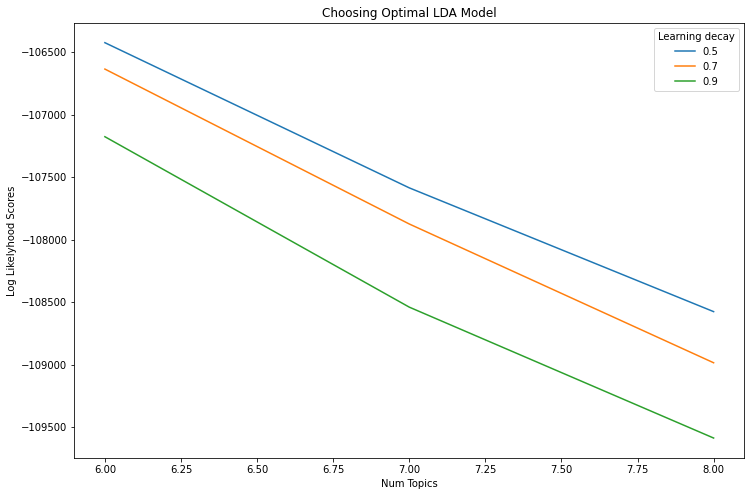

In [28]:
# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [29]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\n Topic #{}: ".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])
        print(message)
        print("="*70)

In [30]:
n_top_words = 40
print("\n Topics in the LDA model: ")
tf_feature_names = count_vectorizer.get_feature_names()
print_top_words(best_lda_model, tf_feature_names, n_top_words)


 Topics in the LDA model: 

 Topic #0: is the when to not on and with data in if set by value are unable object query name list possible cannot field app no working filter date be has time string types same ability page or without different wrong

 Topic #1: to of the in should use an it make from with file code table get being change provide methods multiple instead way screen document one json allow implement container swagger image version world fields javadoc other plugin any issues array

 Topic #2: not type for to update does as after path request add missing spring more or docker key feature map return are properties be config via parameters enable need body find than start parse keys deprecated have cluster user call settings

 Topic #3: and for with from in issue fix add to test class new values improve documentation tests editor create added on java column link functions text between integration gson check null annotations objects cloud during localization follow before andr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
def show_topics(vectorizer=count_vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = list()
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [32]:
topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ["Word " + str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ["Topic " + str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,is,the,when,to,not,on,and,with,data,in,if,set,by,value,are
Topic 1,to,of,the,in,should,use,an,it,make,from,with,file,code,table,get
Topic 2,not,type,for,to,update,does,as,after,path,request,add,missing,spring,more,or
Topic 3,and,for,with,from,in,issue,fix,add,to,test,class,new,values,improve,documentation
Topic 4,for,support,add,in,of,and,custom,default,remove,only,parameter,all,tracking,option,some
Topic 5,to,in,how,using,the,method,when,error,can,pattern,with,on,server,not,work


In [33]:
topic_probability_scores = best_lda_model.transform(count_test)
print(topic_probability_scores)

[[0.02412983 0.02399085 0.02387532 0.0238653  0.45926862 0.44487008]
 [0.19234896 0.38607595 0.02094221 0.02095323 0.14740375 0.2322759 ]
 [0.43638392 0.16656064 0.16672919 0.18270695 0.02380966 0.02380964]
 ...
 [0.08333334 0.08333334 0.5833333  0.08333334 0.08333334 0.08333334]
 [0.30957378 0.16665874 0.22291812 0.02380963 0.02380962 0.25323011]
 [0.72197216 0.05555556 0.05555556 0.05555556 0.05555556 0.05580561]]


In [34]:
def get_topic_text(topic, i):
    print("The item {} was labeled {} \n".format(i, topic))
    print(X_test.values[i])
    print("-"*30)

for i in range(10):
    get_topic_text((np.argmax(topic_probability_scores[i])), i)

The item 0 was labeled 4 

['Add cross grid option to survey']
------------------------------
The item 1 was labeled 1 

['How to add a camera to the application']
------------------------------
The item 2 was labeled 0 

['Camera control stops working during landing after a mission']
------------------------------
The item 3 was labeled 3 

['Choose between Airspeed and Ground Speed']
------------------------------
The item 4 was labeled 0 

['Geotag photos']
------------------------------
The item 5 was labeled 5 

['Mapbox maps not displaying features Incorrect reference']
------------------------------
The item 6 was labeled 5 

['On Checklist Tower will be freezed when connected to Solo drone']
------------------------------
The item 7 was labeled 4 

['add terrain data support']
------------------------------
The item 8 was labeled 3 

['Audible battery report issue']
------------------------------
The item 9 was labeled 0 

['Random positioning']
------------------------------


In [35]:
labels = [np.argmax(topic_probability_scores[index]) for index in range(X_test.shape[0]) ]

In [36]:
len(labels)

5325

In [37]:
y.values

array([[ 0],
       [ 4],
       [ 7],
       ...,
       [ 6],
       [24],
       [21]])

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y[split_index:].values, labels)

0.06591549295774649